# **Introduction**

**The Numbers** is a film industry analytics **website** that uses an algorithm to measure box office income. In addition, the organisation provides research services and anticipates **revenue for film projects**.

* Do larger film budgets result in bigger box office receipts? Let's see if there's a relationship utilising data from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018** for movie budgets and financial performance.

### Importing Statements 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Display

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Loading CSV

In [3]:
df = pd.read_csv('cost_revenue_dirty.csv')
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


# **Data Cleaning & Exploration**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [5]:
df.shape

(5391, 6)

In [6]:
df.isna().values.any()

False

In [7]:
df.duplicated().values.any()

False

In [8]:
duplicated_row = df[df.duplicated()]
len(duplicated_row)

0

In [9]:
print(f"Is there any NaN values? {df.isna().values.any()}")

Is there any NaN values? False


In [10]:
print(f"Is there any Duplicates? {df.duplicated().values.any()}") 
print(f"Number of Duplicates: {len(duplicated_row)}")

Is there any Duplicates? False
Number of Duplicates: 0


In [11]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        df[col] = df[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    df[col] = pd.to_numeric(df[col])

/var/folders/b3/wkmll6d14273z5hsnzgc3n080000gn/T/ipykernel_1991/2071778013.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].astype(str).str.replace(char, "")


In [12]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [13]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

### Descriptive Statistics

In [14]:
df.USD_Production_Budget.mean()

31113737.57837136

In [15]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


* The average picture costs around $31 million to produce and earns almost three times that much in worldwide revenue. 

* However, many films fail to make money. In fact, all of the films in the bottom quartile lose money, with an average expenditure of $5 million and a worldwide gross of $3.8 million!

* The minimal amount of revenue in the United States and around the world is $0. That's logical. This is the number we would expect to see here if a film was never shown or was cancelled.

In [16]:
df[df['USD_Production_Budget'] == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


* So the lowest budget film in the dataset, **My Date With Drew**, was released on May 8, 2005, and grossed roughly **$181041 with a small $1100 budget**.

In [17]:
df[df['USD_Production_Budget'] == 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


* **Avatar**, which was released on December 18, 2009, has the highest budget in the dataset. It generates **$2783918982($2.7 Billion Revenue) in international income with a budget of $425000000**.

### The Zero Revenue Films

In [18]:
zero_domestic = df[df['USD_Domestic_Gross'] == 0]

In [19]:
print(f"Number of Films that grossed $0 Domestically: {len(zero_domestic)}")

Number of Films that grossed $0 Domestically: 512


In [20]:
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


* There are some films that have a large budget but no money **because they were not released at the time**. These films had not yet been released at the time of data collection.

In [21]:
zero_worldwide = df[df['USD_Worldwide_Gross'] == 0]

In [22]:
print(f"Number of Films that grossed $0 Worldwide: {len(zero_worldwide)}")

Number of Films that grossed $0 Worldwide: 357


In [23]:
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [24]:
international_release = df.loc[(df.USD_Domestic_Gross == 0) & (df.USD_Worldwide_Gross != 0)]

In [25]:
print(f"Number of International Releases: {len(international_release)}")

Number of International Releases: 155


In [26]:
international_release.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


In [27]:
international_release = df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

In [28]:
len(international_release)

155

### Getting Rid of Unreleased Films

In [29]:
scraping_date = pd.Timestamp('2018-05-01')
scraping_date

Timestamp('2018-05-01 00:00:00')

In [30]:
future_releases = df[df.Release_Date >= scraping_date]
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [31]:
print(f"Number of Future Releases: {len(future_releases)}")

Number of Future Releases: 7


In [32]:
data_clean = df.drop(future_releases.index)

In [33]:
data_clean.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00","5,384.00","5,384.00","5,384.00"
mean,"2,698.11","31,038,476.84","88,970,947.21","41,289,131.75"
std,"1,555.79","40,440,041.47","168,536,755.89","66,055,507.64"
min,1.00,"1,100.00",0.00,0.00
25%,"1,351.75","5,000,000.00","3,929,036.00","1,354,765.25"
50%,"2,698.50","17,000,000.00","27,537,329.00","17,221,932.00"
75%,"4,045.25","40,000,000.00","96,641,996.25","52,403,530.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


### Losing Money

In [34]:
losing_money = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
losing_money

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [35]:
len(losing_money)/len(df)

0.3722871452420701

In [36]:
print(f"We see that a whopping '{len(losing_money)/len(df)}' % of films do not recoup their production budget at the box office")

We see that a whopping '0.3722871452420701' % of films do not recoup their production budget at the box office


# **Visualization**

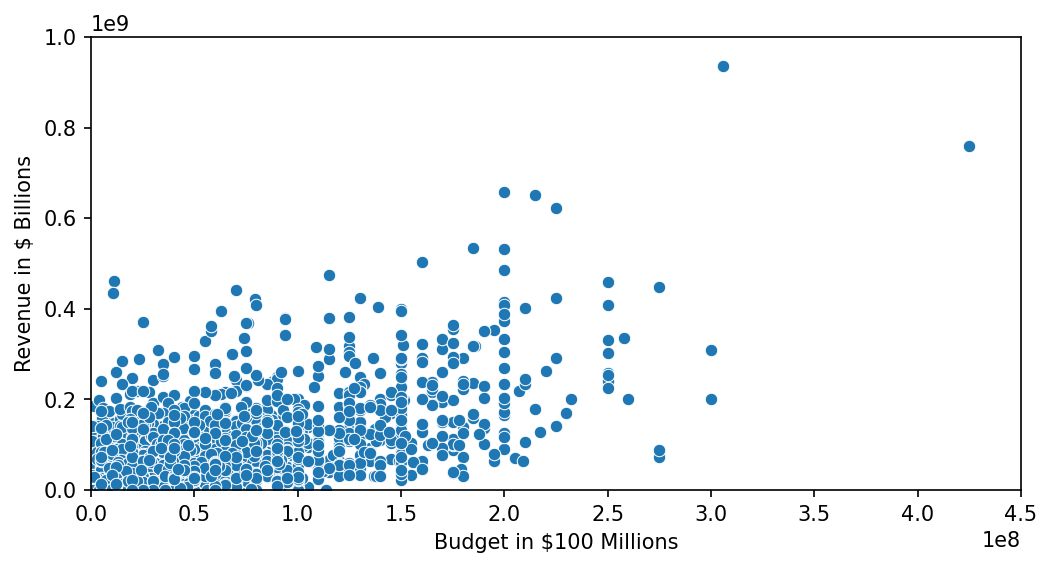

In [37]:
plt.figure(figsize=(8,4),dpi=150)
ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Domestic_Gross')
ax.set(ylim=(0, 1000000000),
      xlim=(0, 450000000),
      ylabel='Revenue in $ Billions',
      xlabel='Budget in $100 Millions')
plt.show();

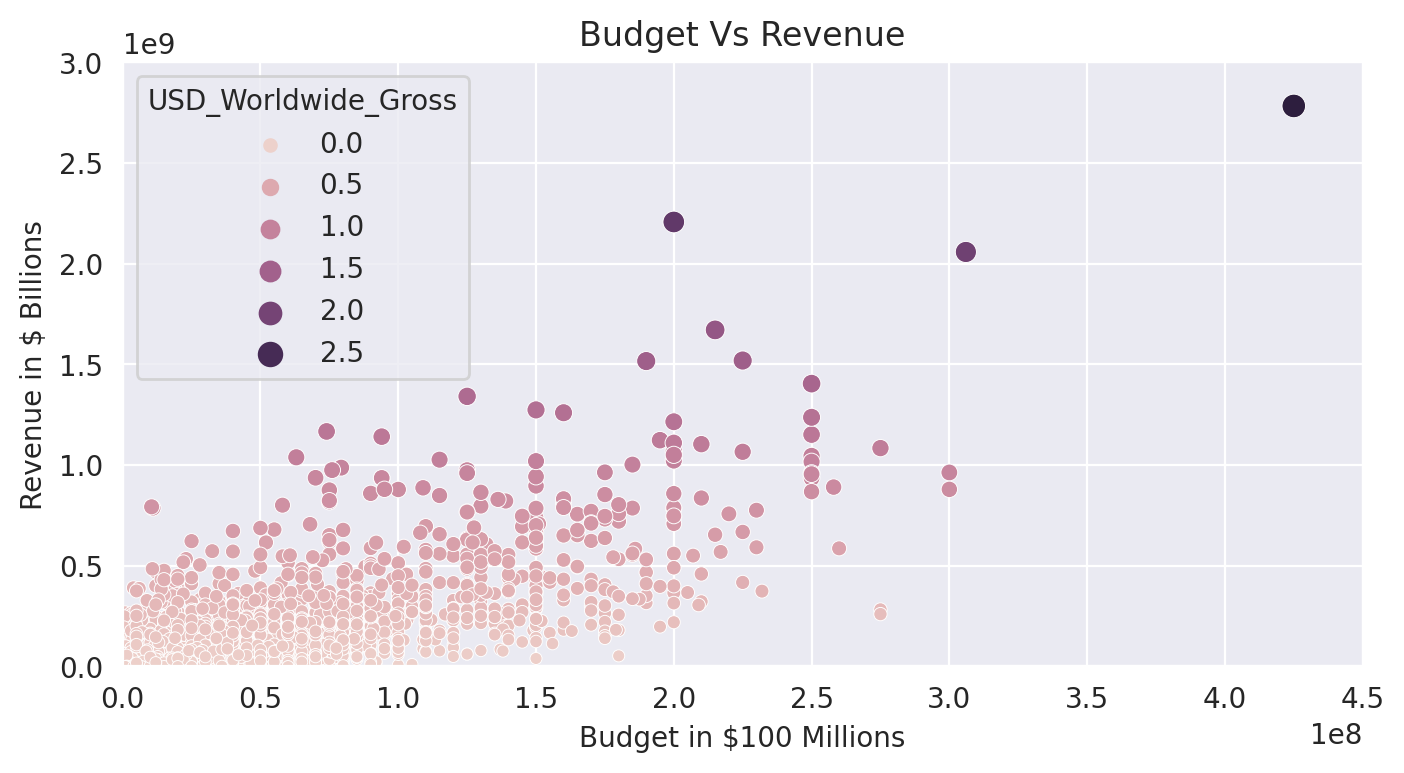

In [38]:
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style('darkgrid'):

    ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

    ax.set(ylim=(0, 3000000000),
      xlim=(0, 450000000),
      ylabel='Revenue in $ Billions',
      xlabel='Budget in $100 Millions',
      title="Budget Vs Revenue");

* **higher** grossing movies are **bigger and darker** on our chart.

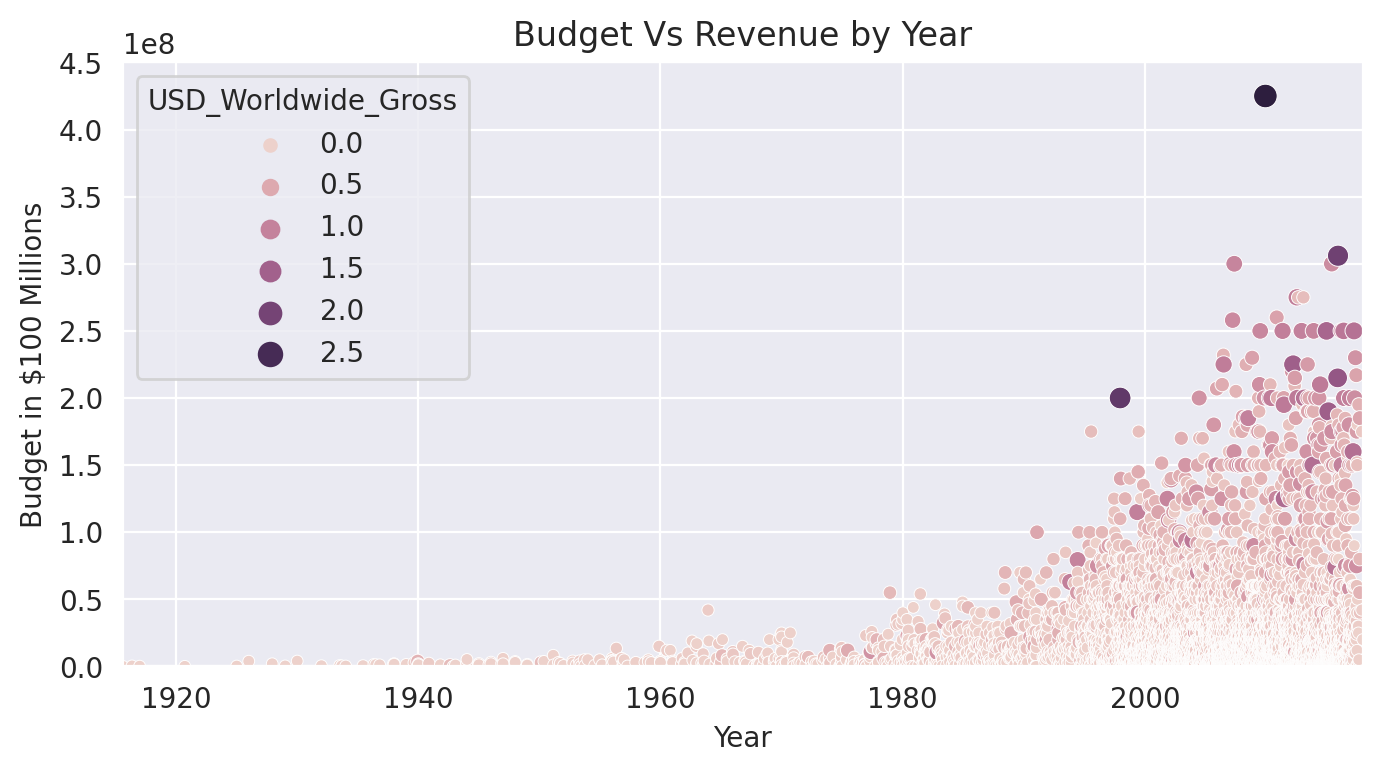

In [39]:
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style('darkgrid'):

    ax = sns.scatterplot(data=data_clean, x='Release_Date', y='USD_Production_Budget', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

    ax.set(xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
      ylim=(0, 450000000),
      ylabel='Budget in $100 Millions',
      xlabel='Year',
      title="Budget Vs Revenue by Year")
plt.show();

* In the last **40 years or more**, movie budgets have **skyrocketed**. The film industry seemed to have existed in a distinct age until the 1970s. Budgets began to **expand rapidly in the 1980s and continued to do so throughout the 2000s**. In addition, the industry has expanded dramatically, generating many more films than previously. **From 2000 forward, the number of data points is so intense that they overlap**.

### Lets make new Datasets for Old & New films

In [40]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

In [41]:
# converting year 1999 to the 90s decades

1999//10

199

In [42]:
199*10

1990

In [43]:
decades = years//10*10
data_clean['Decades'] = decades

In [44]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [45]:
old_films = data_clean[data_clean.Decades <= 1969]
new_films = data_clean[data_clean.Decades > 1970]

In [46]:
print(f"Number of Old Films: {len(old_films)}")
print(f"Number of New Films: {len(new_films)}")

Number of Old Films: 153
Number of New Films: 5122


In [47]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [48]:
old_films.nlargest(5,'USD_Production_Budget')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


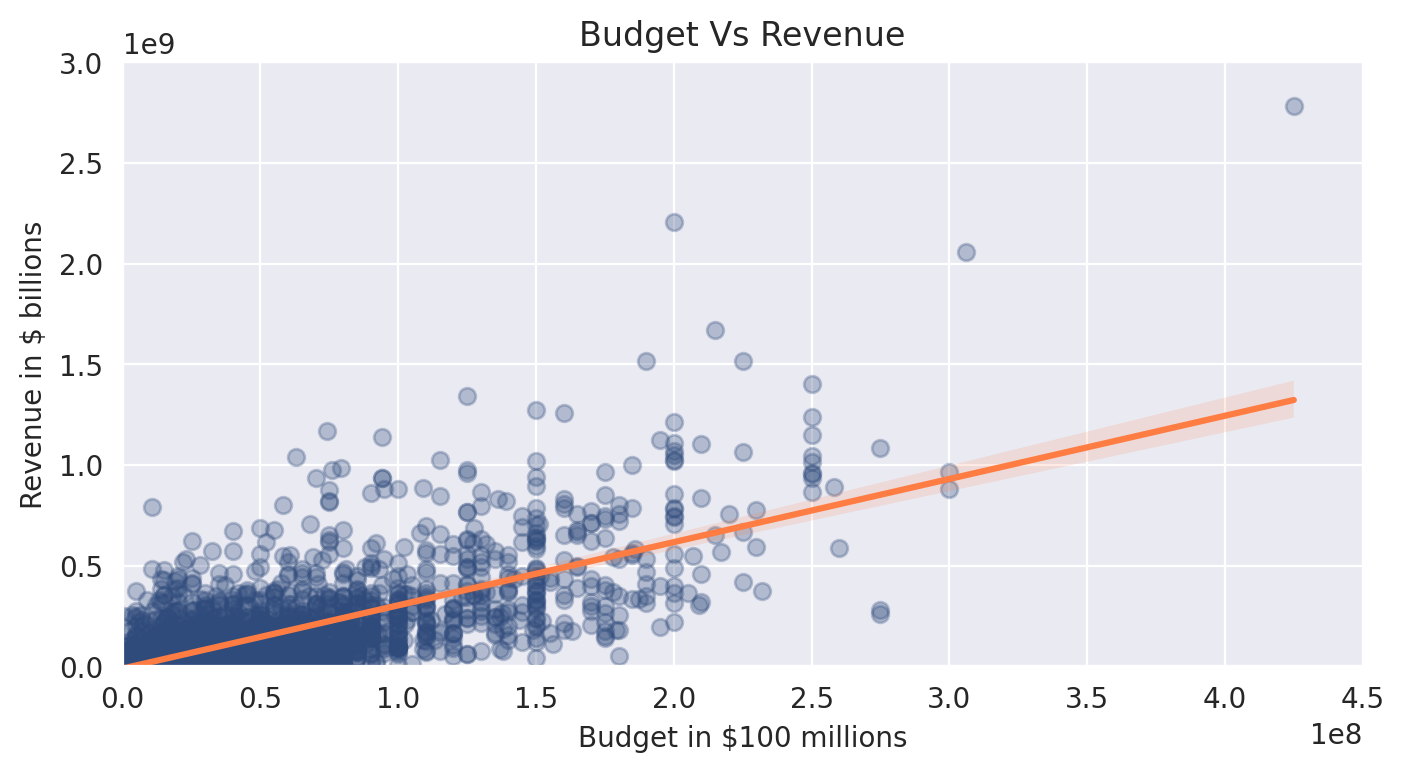

In [71]:
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=new_films,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross', 
                     color='#2f4b7c', 
                     scatter_kws={'alpha':0.3}, 
                     line_kws={'color': '#ff7c43'})
    
    ax.set(xlabel='Budget in $100 millions',
           ylabel='Revenue in $ billions', 
           ylim=(0,3000000000), 
           xlim=(0,450000000), 
           title='Budget Vs Revenue')

# **Linear Regression**

### For New Films

In [76]:
regression = LinearRegression()

X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
regression.fit(X,y)

LinearRegression()

In [72]:
regression.intercept_

array([22821538.63508038])

In [74]:
regression.coef_

array([[3.13834648]])

In [75]:
regression.score(X, y)

0.564250171393927

In [77]:
print(f"The slope Coefficient is {regression.coef_[0]}")
print(f"The Intercept is {regression.intercept_[0]}")
print(f"The R Squared is {regression.score(X, y)}")

The slope Coefficient is [3.13834648]
The Intercept is -10278584.793979824
The R Squared is 0.564250171393927


* Our **R-squared** value is approximately 0.564250171393927. This suggests that our model accounts for roughly **56% of the variation in movie income**.

### For Old Films

In [81]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The r-squared is: {regression.score(X, y)}')

The slope coefficient is: [1.64771314]
The intercept is: 22821538.635080382
The r-squared is: 0.02937258620576877


* We can see how **ineffective** the linear model is for films made **before 1970**. Because the slope is **1.6**, we still detect a **positive relationship between budgets and revenue**, but the **r-squared is relatively low**.

### Let's imagine we have a $400 million movie budget. What will our film revenue be?

In [96]:
total_budget = 400000000
estimated_revenue = regression.intercept_[0] + regression.coef_[0,0]* total_budget
estimated_revenue = round(estimated_revenue, -6)
print(f'As a result, the revenue we will generate will be ${estimated_revenue:.10}, based on a budget of $400 million.')

As a result, the revenue we will generate will be $682000000.0, based on a budget of $400 million.
